# Born To Run

In [1]:
import numpy
import math
import wave
import sys 
import pygame
from pygame.locals import *

Number = 1000 # number of bars
HEIGHT = 600 # height of bars
WIDTH = 2 # width of bars
FPS = 15 # Frames per second

file_name = sys.argv[0]
status = 'stopped'
fpsclock = pygame.time.Clock()

#screen init, music playback

pygame.init()
pygame.mixer.init()

screen = pygame.display.set_mode([Number * WIDTH, 50 + HEIGHT])
pygame.display.set_caption('Music Visualizer')
my_font = pygame.font.SysFont('Arial', 20)
pygame.mixer.music.load("born_to_run.wav")

pygame.mixer.music.play()
pygame.mixer.music.set_endevent()
status = "Playing"

#process wave data

f = wave.open("born_to_run.wav", 'rb')
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
f.close()
wave_data = numpy.fromstring(str_data, dtype = numpy.short)
wave_data.shape = -1, 2
wave_data = wave_data.T

num = nframes

def smooth_waveform(audio_segment, alpha=0.1):
    smoothed_data = [audio_segment[0]]  # Start with the first value

    for i in range(1, len(audio_segment)):
        smoothed_value = alpha * smoothed_data[-1] + (1 - alpha) * audio_segment[i]
        smoothed_data.append(smoothed_value)

    return smoothed_data

def Visualizer(nums):
    num = int(nums)
    audio_segment = wave_data[0][nframes - num:nframes - num + Number]

    # Smooth the waveform using a low-pass filter
    smoothed_data = smooth_waveform(audio_segment)

    # Decrease the height by multiplying with a scaling factor (e.g., 0.5)
    scaling_factor = 0.01
    scaled_data = [min(HEIGHT, int(i * HEIGHT * scaling_factor / 400)) for i in smoothed_data]
    draw_bars(scaled_data)


def vis(status):
    global num
    if status == "stopped":
        num = nframes
        return
    elif status == "paused":
        Visualizer(num)
    else:
        num -= framerate / FPS
        if num > 0:
            Visualizer(num)

def get_time():
    seconds = max(0, pygame.mixer.music.get_pos() / 1000)
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    hms = ("%02d:%02d:%02d" % (h, m, s))
    return hms


def draw_bars(h):
    bars = []
    for i in h:
        bars.append([len(bars) * WIDTH , 50 + HEIGHT - i, WIDTH - 1, i])
    for i in bars:
        pygame.draw.rect(screen, [165,97,91], i, 0)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            sys.exit()
        elif event.type == KEYDOWN:
            if status == "stopped":
                if event.key == K_RETURN:
                    pygame.mixer_music.play()
                    status = "playing"
            elif status == "paused":
                if event.key == K_RETURN:
                    pygame.mixer_music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.unpause()
                    status = "playing"
            elif status == "playing":
                if event.key == K_RETURN:
                    pygame.mixer.music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.pause()
                    status = "paused"

    if num <= 0:
        status = "stopped"

    name = my_font.render(file_name, True, (255,255,255))
    info = my_font.render(status.upper() + "" + get_time(), True, (255,255,255))
    screen.fill((0,0,0))    #color of the screen. used as bars here
    screen.blit(name,(0,0)) #Draws one surface on top of another
    screen.blit(info,(0, 18))
    fpsclock.tick(FPS)
    vis(status)
    pygame.display.update()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_9540/532540007.py:38: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = numpy.fromstring(str_data, dtype = numpy.short)


SystemExit: 

/Users/manny/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
quit

# Born To Run (FFT)

In [1]:
# GOOD BUT NEEDS WORK

import numpy
import math
import wave
import sys 
import pygame
from pygame.locals import *
from scipy.fft import fft

Number = 750 # number of bars
HEIGHT = 600 # height of bars
WIDTH = 5 # width of bars
FPS = 15 # MAKE THIS SMOOTH

file_name = sys.argv[0]
status = 'stopped'
fpsclock = pygame.time.Clock()

#screen init, music playback

pygame.init()
pygame.mixer.init()

screen = pygame.display.set_mode([Number * WIDTH, 50 + HEIGHT])
pygame.display.set_caption('Music Visualizer')
my_font = pygame.font.SysFont('Arial', 20)
pygame.mixer.music.load("born_to_run.wav")

pygame.mixer.music.play()
pygame.mixer.music.set_endevent()
status = "Playing"

#process wave data

f = wave.open("born_to_run.wav", 'rb')
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
f.close()
wave_data = numpy.fromstring(str_data, dtype = numpy.short)
wave_data.shape = -1, 2
wave_data = wave_data.T

num = nframes

def smooth_waveform(audio_segment, alpha=0.5):
    smoothed_data = [audio_segment[0]]  # Start with the first value

    for i in range(1, len(audio_segment)):
        smoothed_value = alpha * smoothed_data[-1] + (1 - alpha) * audio_segment[i]
        smoothed_data.append(smoothed_value)

    return smoothed_data

def Visualizer(nums):
    num = int(nums)
    audio_segment = wave_data[0][nframes - num:nframes - num + Number]

     # Apply Fourier transform to get frequency components
    frequency_components = fft(audio_segment)

    # Calculate magnitude spectrum
    magnitude_spectrum = numpy.abs(frequency_components)[:Number // 1]

    # Normalize the magnitude spectrum
    normalized_spectrum = magnitude_spectrum / max(magnitude_spectrum)

    draw_bars(normalized_spectrum)


def vis(status):
    global num
    if status == "stopped":
        num = nframes
        return
    elif status == "paused":
        Visualizer(num)
    else:
        num -= framerate / FPS
        if num > 0:
            Visualizer(num)

def get_time():
    seconds = max(0, pygame.mixer.music.get_pos() / 1000)
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    hms = ("%02d:%02d:%02d" % (h, m, s))
    return hms

def draw_bars(h):
    bars = []
    for i in h:
        bars.append([len(bars) * WIDTH, 50 + HEIGHT - i * HEIGHT, WIDTH - 1, i * HEIGHT])
    for i in bars:
        pygame.draw.rect(screen, [165,97,91], i, 0)

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            sys.exit()
        elif event.type == KEYDOWN:
            if status == "stopped":
                if event.key == K_RETURN:
                    pygame.mixer_music.play()
                    status = "playing"
            elif status == "paused":
                if event.key == K_RETURN:
                    pygame.mixer_music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.unpause()
                    status = "playing"
            elif status == "playing":
                if event.key == K_RETURN:
                    pygame.mixer.music.stop()
                    status = "stopped"
                elif event.key == K_SPACE:
                    pygame.mixer.music.pause()
                    status = "paused"

    if num <= 0:
        status = "stopped"

    name = my_font.render(file_name, True, (255,255,255))
    info = my_font.render(status.upper() + "" + get_time(), True, (255,255,255))
    screen.fill((0,0,0))    #color of the screen. used as bars here
    screen.blit(name,(0,0)) #Draws one surface on top of another
    screen.blit(info,(0, 18))
    fpsclock.tick(FPS)
    vis(status)
    pygame.display.update()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_16764/2143099354.py:41: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = numpy.fromstring(str_data, dtype = numpy.short)


SystemExit: 

/Users/manny/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
quit

# Plots for Data Analysis

For a fast Fourier transform of a frequency versus amplitude plot:

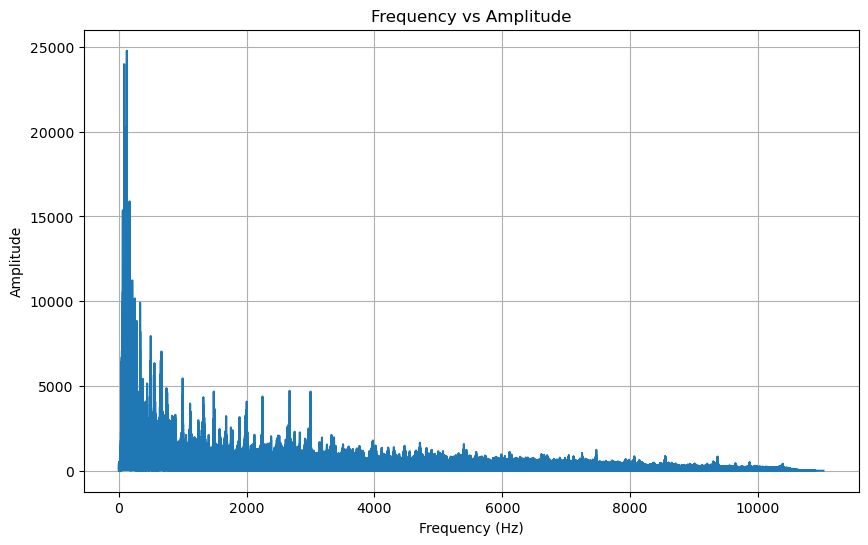

In [2]:
from IPython.display import Audio, display
import matplotlib.pyplot as plt
import numpy as np
import librosa as lb
import librosa.display

# Load the audio file
audio_path = '/Users/manny/Computational Methods In Physics/Final Project/born_to_run.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path)

# Perform FFT to get the frequency domain representation
fft_result = np.fft.fft(y)
magnitude_spectrum = np.abs(fft_result)[:len(fft_result)//2] 
frequencies = np.fft.fftfreq(len(fft_result), 1/sr)[:len(fft_result)//2]

# Plot frequency vs amplitude
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude_spectrum)
plt.title('Frequency vs Amplitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

For a time vs time versus amplitude:

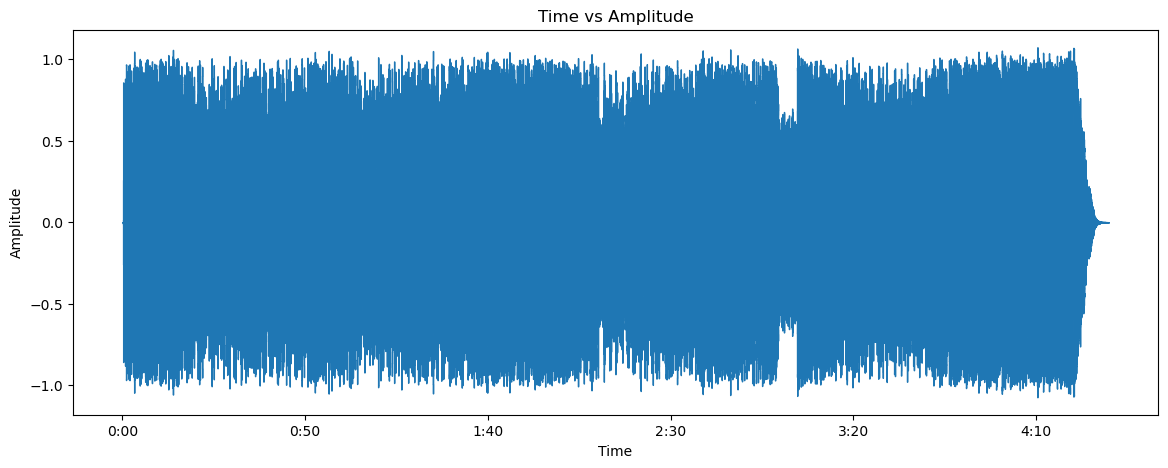

In [4]:
x, sr = librosa.load('/Users/manny/Computational Methods In Physics/Final Project/born_to_run.wav') # line needed to get step 5 to run. DO NOT CHANGE

%matplotlib inline

plt.figure(figsize=(14, 5))
plt.title('Time vs Amplitude')
plt.xlabel('Time')
plt.ylabel('Amplitude')
librosa.display.waveshow(x, sr=sr)